# aGAL trajecotries evaluation

To be run after production is completed.


The notebook accounts for RMSD and RMSF computation and plotting of whole protein (using Ca), ligand and glycans.

Data obtained from running the rmsd and rmsf functions is stored in csv files in the /results/tables folder, under the filename specified in input.
The notebook also includes the possibility to use such data to generate summary plots for a specific feature analysed, you can modify the provided ones to adjust to other RMSD or RMSF evaluations.

**NOTE** `rmsd` and `rmsf` functions compute the respective metric only once if the filename input is already present in the `results/tables/` folder.


Import required packages and functions:

In [1]:
import pandas as pd 
import numpy as np
from moleculekit.molecule import Molecule

from rmsd import * 
from rmsf import *

#set default fontsize
plt.rcParams.update({
	'axes.titlesize': 15,
	'axes.labelsize': 15,
	'xtick.labelsize': 15,
	'ytick.labelsize': 15,
	'legend.fontsize': 15,
	'legend.title_fontsize': 15,
})

## RMSD

### Whole protein - CA

In [ ]:
structure = ['apo', 'apo_N215S', 'apo_R301Q', 'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh_s10.xtc'
        rmsd(f'{s}{r}_CA_P0', topology, trajectory,  trajrmsdstr='protein and name CA and segid P0', trajalnstr='protein and name CA',refalnstr='protein and name CA',  refrmsdstr = 'protein and name CA and segid P0')
        rmsd(f'{s}{r}_CA_P1', topology, trajectory,  trajrmsdstr='protein and name CA and segid P1', trajalnstr='protein and name CA',refalnstr='protein and name CA', refrmsdstr = 'protein and name CA and segid P1') 


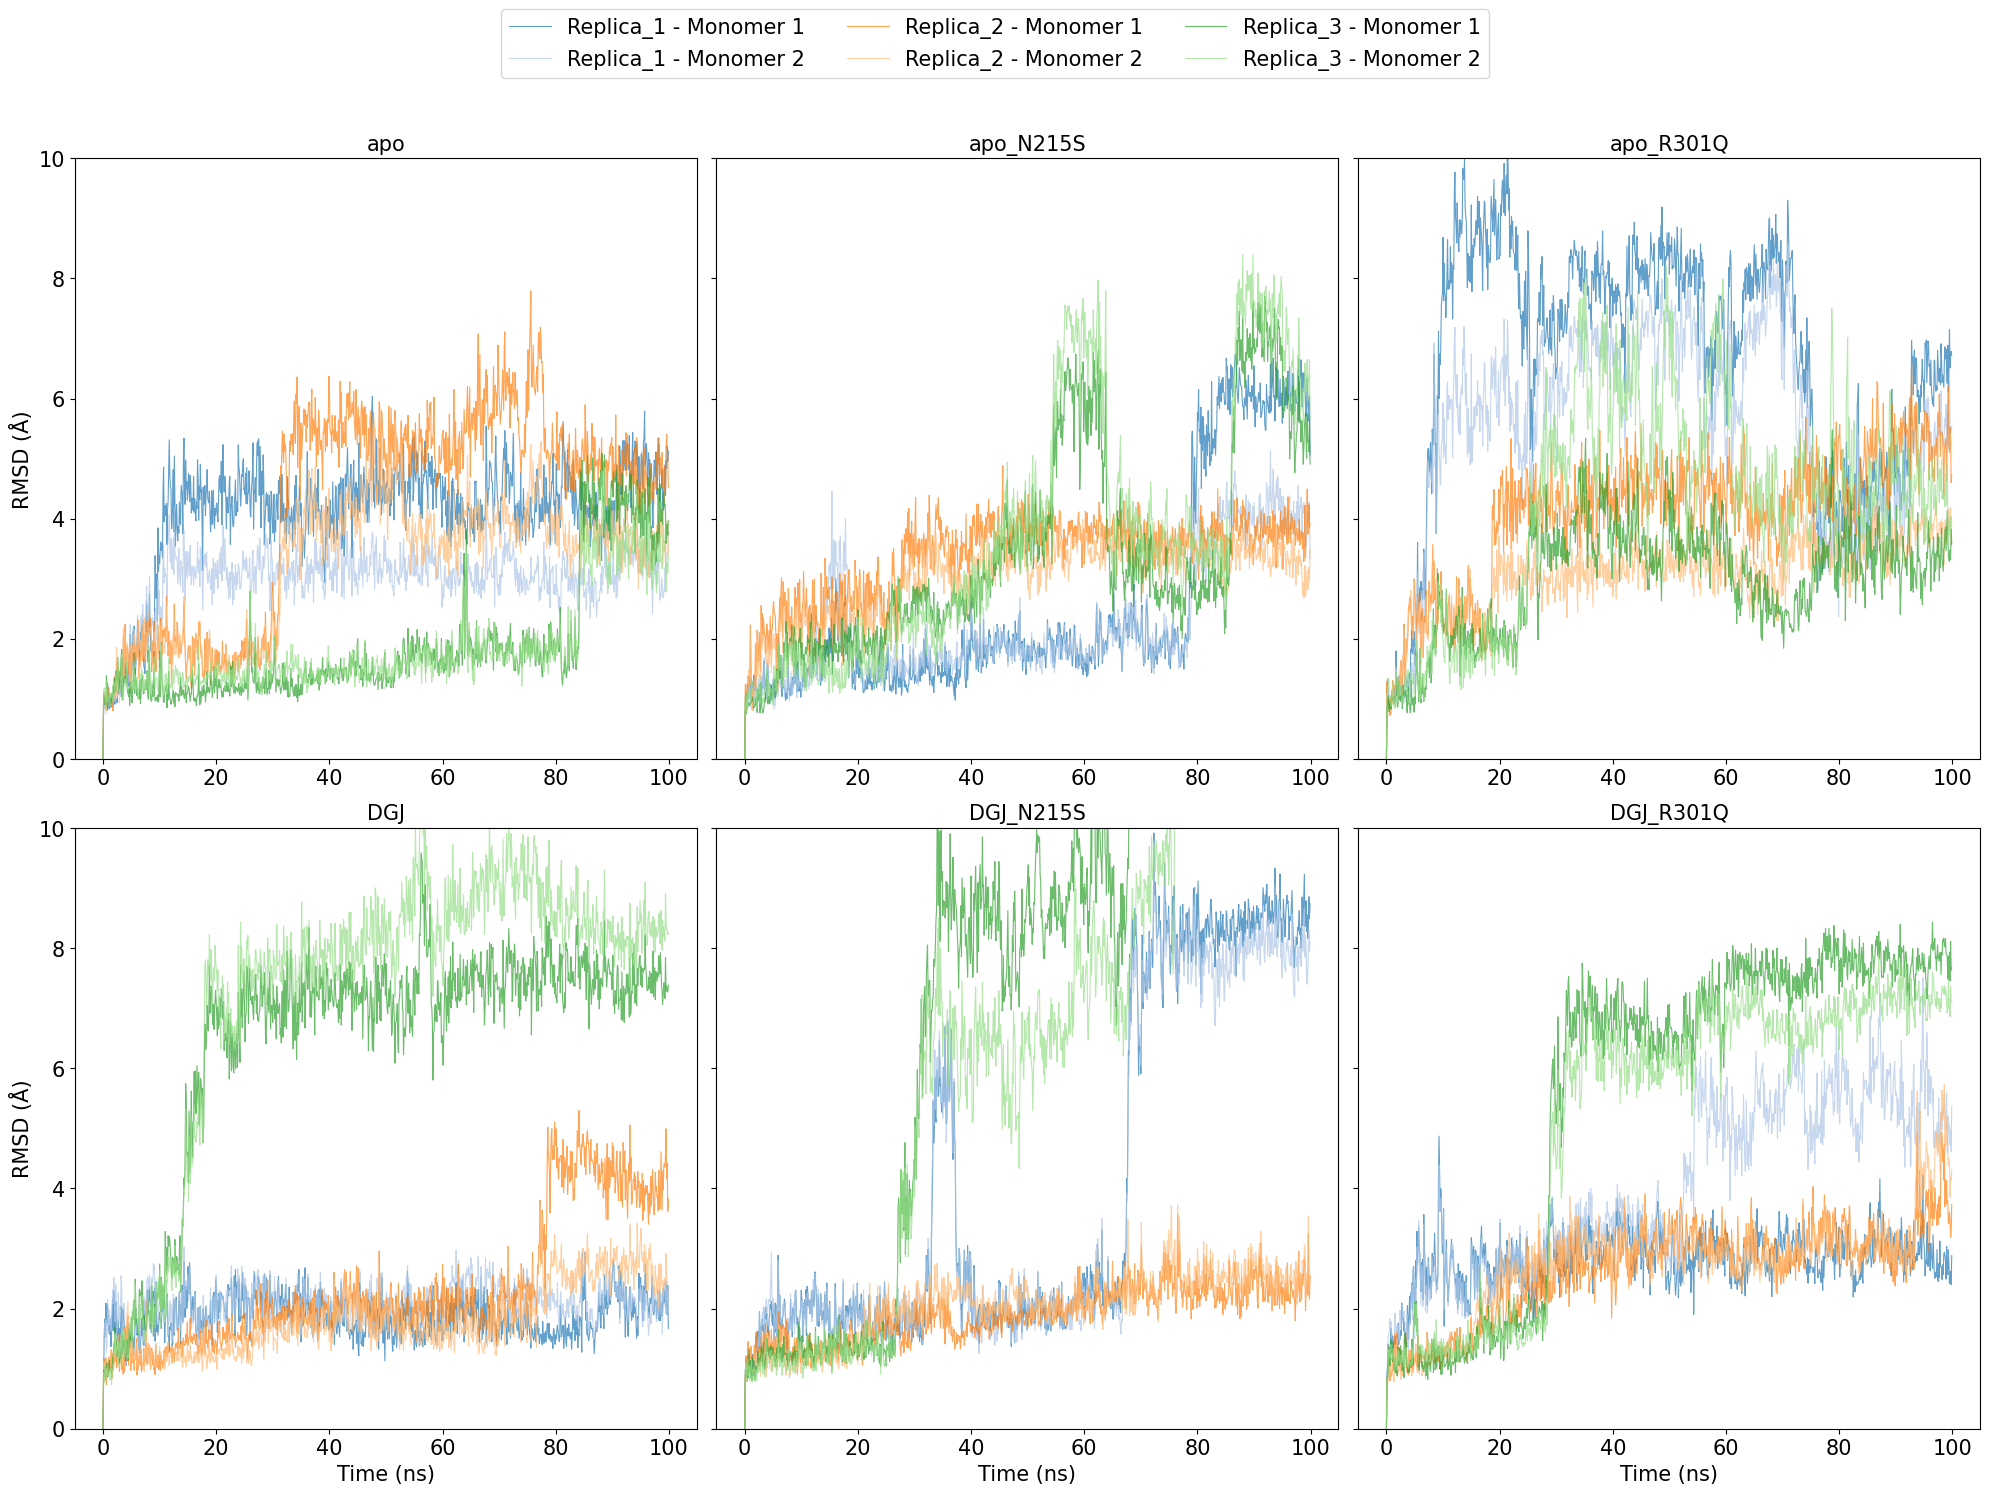

In [5]:
structures = ['apo', 'apo_N215S', 'apo_R301Q', 
              'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']

cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    '_1_P0': colors[0], '_1_P1': colors[1],
    '_2_P0': colors[2], '_2_P1': colors[3],
    '_3_P0': colors[4], '_3_P1': colors[5],}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15), sharey=True)
axes = axes.flatten()  # easier to index

for i, s in enumerate(structures):
    ax = axes[i]
    for r in replicas:
        data1 = pd.read_csv(f'../results/tables/{s}{r}_CA_P0_rmsd.csv')
        data2 = pd.read_csv(f'../results/tables/{s}{r}_CA_P1_rmsd.csv')
        if i == 0:
            ax.plot(data1['time'], data1['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7, label=f"Replica{r} - Monomer 1",color=replica_colors[f"{r}_P0"])
            ax.plot(data2['time'], data2['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7, label=f"Replica{r} - Monomer 2",color=replica_colors[f"{r}_P1"])
        else:
            ax.plot(data2['time'], data2['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7,color=replica_colors[f"{r}_P0"])
            ax.plot(data1['time'], data1['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7,color=replica_colors[f"{r}_P1"])

    ax.set_title(s)

    ax.set_ylim(0,10)
    if i < 3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel("Time (ns)")
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel("RMSD (Å)")


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1),ncol=3)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("../results/plots/rmsd_CA_sep.pdf", dpi=300)
_=plt.show()

### Ligand

In [ ]:
structure = ['DGJ', 'DGJ_N215S', 'DGJ_R301Q'] #apo doesn't have it obviously
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh.psf' #non caricare come topology COME PSF
        trajectory = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh_s10.xtc'
        
        rmsd(f'{s}{r}_lig_P0', topology, trajectory,  trajrmsdstr='resname DGJ and resid 1 and noh',trajalnstr='segid P0 and name CA',refalnstr='segid P0 and name CA', refrmsdstr = 'resname DGJ and resid 1 and noh' )
        rmsd(f'{s}{r}_lig_P1', topology, trajectory,  trajrmsdstr='resname DGJ and resid 2 and noh',trajalnstr='segid P1 and name CA',refalnstr='segid P1 and name CA', refrmsdstr = 'resname DGJ and resid 2 and noh' )

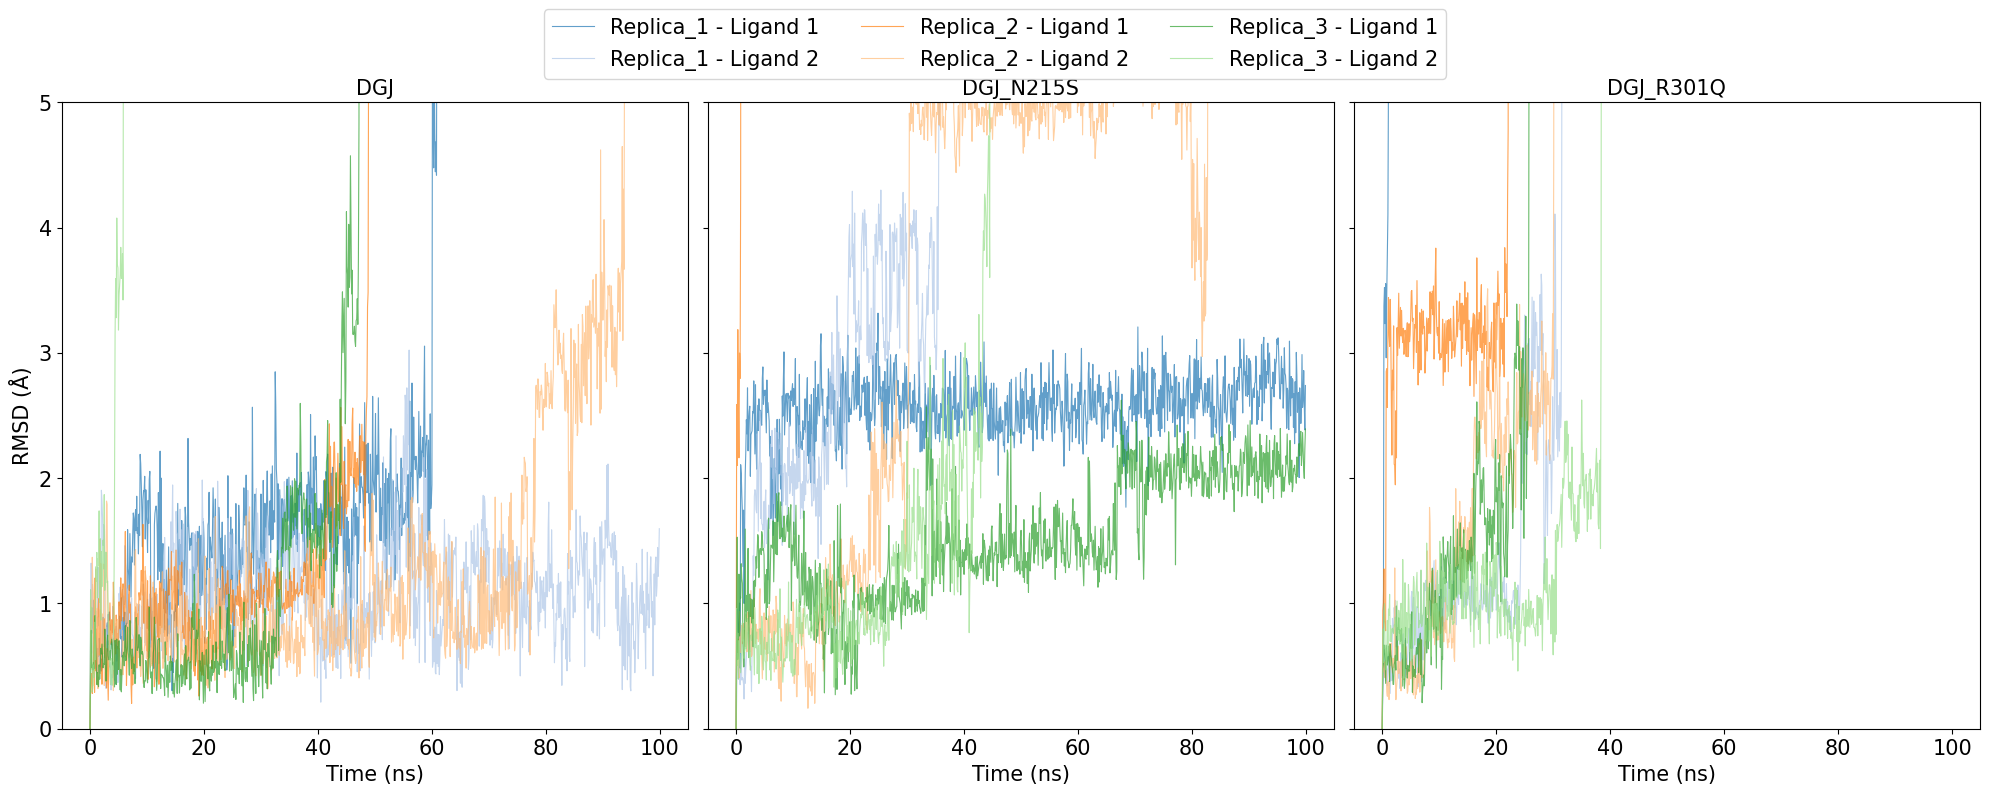

In [8]:
structures = ['DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']

cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    '_1_P0': colors[0], '_1_P1': colors[1],
    '_2_P0': colors[2], '_2_P1': colors[3],
    '_3_P0': colors[4], '_3_P1': colors[5],
}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8), sharey=True)
axes = axes.flatten()  # easier to index

for i, s in enumerate(structures):
    ax = axes[i]
    for r in replicas:
        lig1 = pd.read_csv(f'../results/tables/{s}{r}_lig_P0_rmsd.csv')
        lig2 = pd.read_csv(f'../results/tables/{s}{r}_lig_P1_rmsd.csv')
        if i == 0:
            ax.plot(lig1['time'], lig1['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7, label=f"Replica{r} - Ligand 1",color=replica_colors[f"{r}_P0"])
            ax.plot(lig2['time'], lig2['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7, label=f'Replica{r} - Ligand 2',color=replica_colors[f"{r}_P1"])
        else:
            ax.plot(lig2['time'], lig2['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7,color=replica_colors[f"{r}_P0"])
            ax.plot(lig1['time'], lig1['rmsd'], linestyle='-', linewidth=0.8, alpha=0.7,color=replica_colors[f"{r}_P1"])

    ax.set_title(s)
    ax.set_ylim(0,5)
    ax.set_xlabel("Time (ns)")
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel("RMSD (Å)")


fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
           ncol=3, )

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("../results/plots/rmsd_lig_sep.pdf", dpi=300)

## RMSF

### Whole protein - CA

In [ ]:
structure = ['apo', 'apo_N215S', 'apo_R301Q', 'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh_s10.xtc'
        
        rmsf(f'{s}{r}_CA_P0', topology, trajectory, atomsel = 'segid P0 and name CA', trajalnsel='segid P0 and name CA', refalnsel='segid P0 and name CA' )
        rmsf(f'{s}{r}_CA_P1', topology, trajectory, atomsel = 'segid P1 and name CA', trajalnsel='segid P1 and name CA', refalnsel='segid P1 and name CA' )


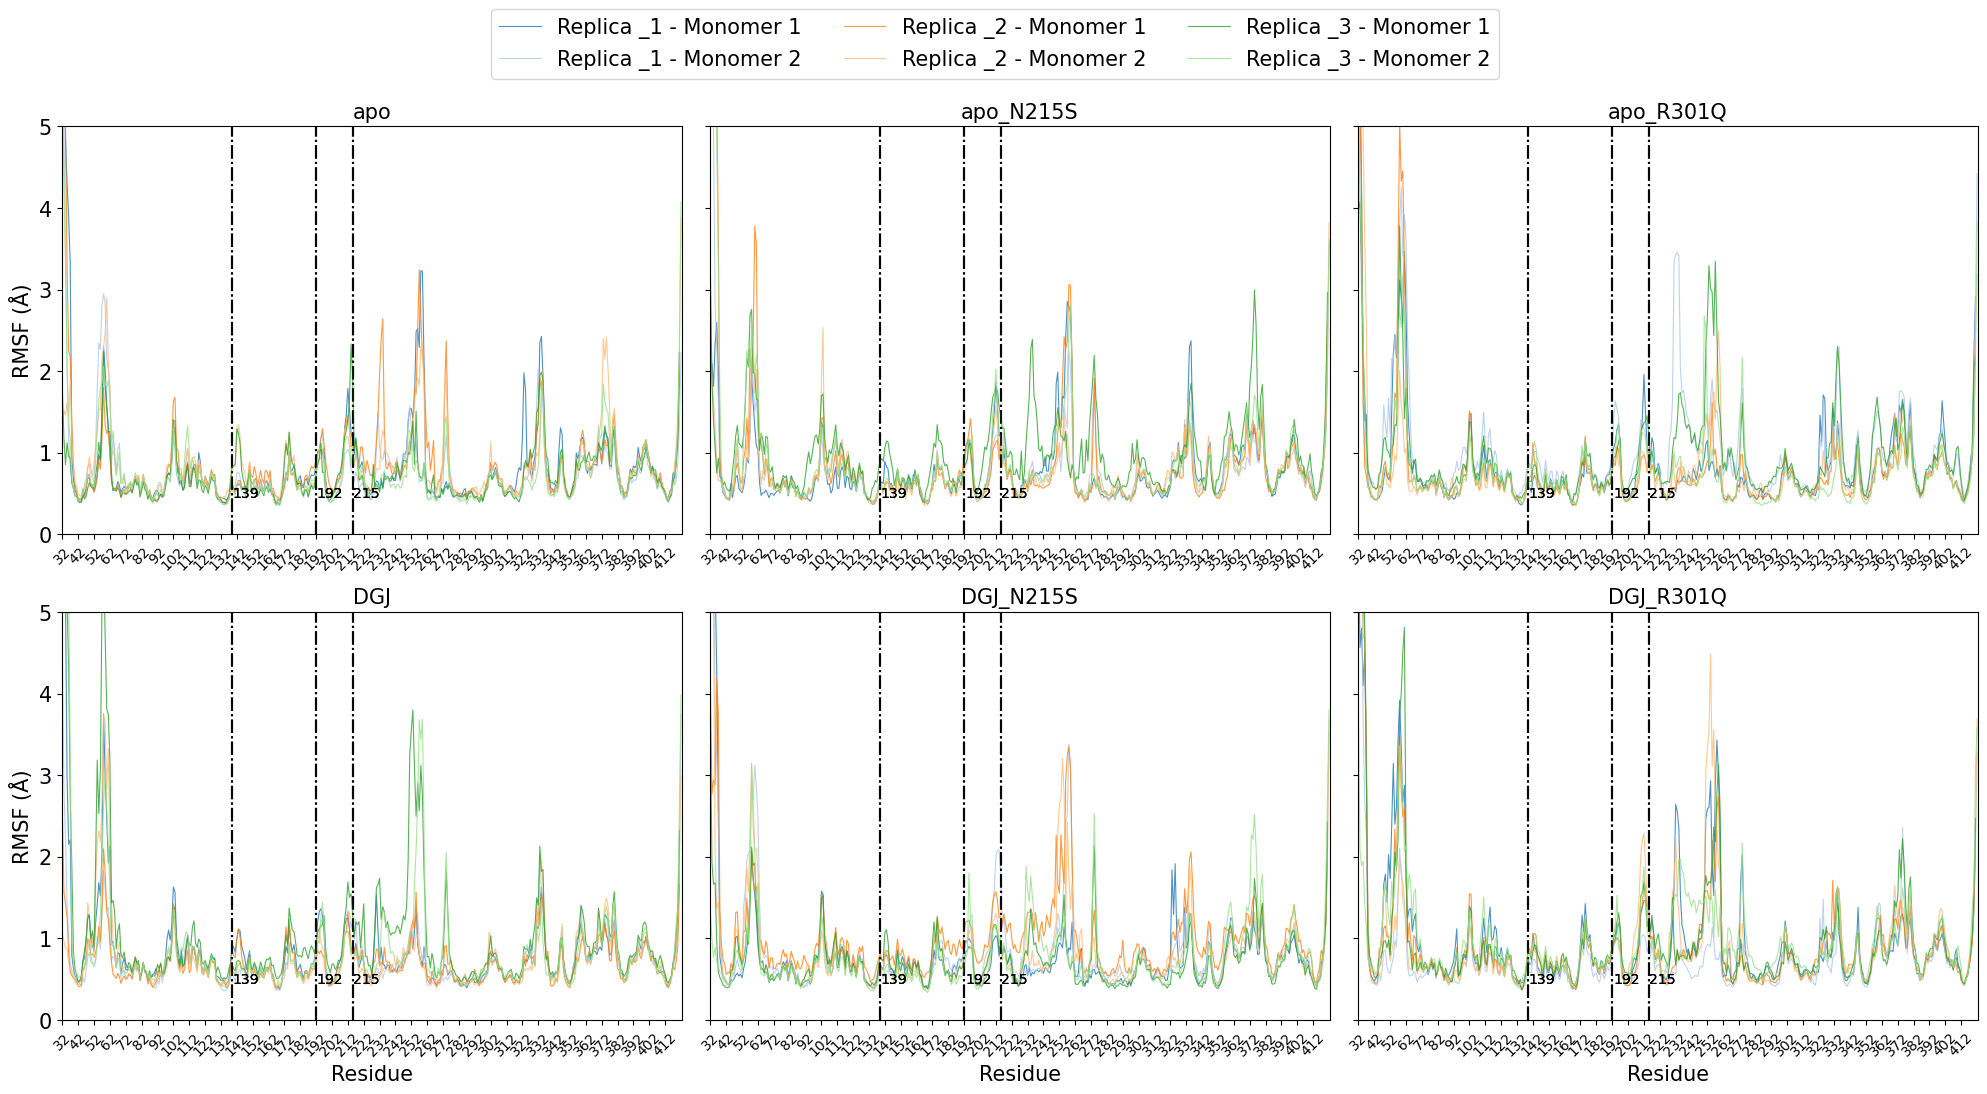

In [10]:
#rmsf computed on replicas separately 
structures = ['apo', 'apo_N215S', 'apo_R301Q',
              'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']

fig, axes = plt.subplots(2, 3, figsize=(20, 11), sharey=True)
axes = axes.flatten()

cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    '_1_P0': colors[0], '_1_P1': colors[1],
    '_2_P0': colors[2], '_2_P1': colors[3],
    '_3_P0': colors[4], '_3_P1': colors[5],
}

for i, s in enumerate(structures):
    ax = axes[i]
    for r in replicas:
        #if s == 'DGJ_N215S' and r == '_3':
        #    continue 

        chainP0 = pd.read_csv(f'../results/tables/{s}{r}_CA_P0_rmsf.csv')
        chainP1 = pd.read_csv(f'../results/tables/{s}{r}_CA_P1_rmsf.csv')
        ax.plot(chainP0['resid'], chainP0['rmsf'],
                linestyle="-", linewidth=0.8, label=f"Replica {r} - Monomer 1", alpha=0.8, color=replica_colors[f"{r}_P0"])
        ax.plot(chainP1['resid'], chainP1['rmsf'],
                linestyle="-", linewidth=0.8, label=f"Replica {r} - Monomer 2", alpha=0.8, color=replica_colors[f"{r}_P1"])

        # Glycosylation sites
        first = True
        for marker_resid in [139, 192, 215]:
            ax.axvline(marker_resid, color="black", linestyle="-.", alpha=0.7)
            ax.text(marker_resid + 0.5, 0.5, str(marker_resid),
                    va='center', ha='left', color='black')
            first = False

        step = 10
        unique_resid = np.unique(chainP0['resid'])
        all_ticks = sorted(set(list(unique_resid[::step])))
        ax.set_xticks(all_ticks)
        ax.set_xticklabels(all_ticks, rotation=45, fontsize= 10)
        ax.set_xlim(chainP0['resid'].min() - 0.5, chainP1['resid'].max() + 0.5)
    
    ax.set_title(s)
    if i // 3 == 1:  
        ax.set_xlabel("Residue")
    else:
        ax.set_xlabel("")
    if i % 3 == 0: 
        ax.set_ylabel("RMSF (Å)")
    else:
        ax.set_ylabel("")
ax.set_ylim(0,5)
handles, labels = axes[0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
fig.legend(unique.values(), unique.keys(),
           loc='upper center', bbox_to_anchor=(0.5, 1),
           ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.92]) 
plt.savefig("../results/plots/rmsf_CA_sep_by_segid.pdf", dpi=300)
_=plt.show()

### Glycans

In [ ]:
structure = ['apo', 'apo_R301Q', 'DGJ', 'DGJ_R301Q']
replica = ['_1', '_2', '_3']

for s in structure:
    for r in replica:
        topology = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh.psf'
        trajectory = f'../3GXT_reglyco/{s}{r}/{s}{r}_noh_s10.xtc'
        
        rmsf(f'{s}{r}_gly_P2', topology, trajectory, atomsel = 'segid P2', trajalnsel='segid P0 and name CA', refalnsel='segid P0 and name CA' )
        rmsf(f'{s}{r}_gly_P3', topology, trajectory, atomsel = 'segid P3', trajalnsel='segid P0 and name CA', refalnsel='segid P0 and name CA' )
        rmsf(f'{s}{r}_gly_P4', topology, trajectory, atomsel = 'segid P4', trajalnsel='segid P0 and name CA', refalnsel='segid P0 and name CA' )
        rmsf(f'{s}{r}_gly_P5', topology, trajectory, atomsel = 'segid P5', trajalnsel='segid P1 and name CA', refalnsel='segid P1 and name CA' )
        rmsf(f'{s}{r}_gly_P6', topology, trajectory, atomsel = 'segid P6', trajalnsel='segid P1 and name CA', refalnsel='segid P1 and name CA' )
        rmsf(f'{s}{r}_gly_P7', topology, trajectory, atomsel = 'segid P7', trajalnsel='segid P1 and name CA', refalnsel='segid P1 and name CA' )

In [ ]:
mutant=['apo_N215S', 'DGJ_N215S'] #they miss a glycan due to the mutation
for m in mutant:
    for r in replica:
        topology = f'../3GXT_reglyco/{m}{r}/{m}{r}_noh.psf'
        trajectory = f'../3GXT_reglyco/{m}{r}/{m}{r}_noh_s10.xtc'
        rmsf(f'{m}{r}_gly_P2', topology, trajectory, atomsel = 'segid P2', trajalnsel='segid P0 and name CA', refalnsel='segid P0 and name CA' )
        rmsf(f'{m}{r}_gly_P3', topology, trajectory, atomsel = 'segid P3', trajalnsel='segid P0 and name CA', refalnsel='segid P0 and name CA' )
        
        rmsf(f'{m}{r}_gly_P5', topology, trajectory, atomsel = 'segid P5', trajalnsel='segid P1 and name CA', refalnsel='segid P1 and name CA' )
        rmsf(f'{m}{r}_gly_P6', topology, trajectory, atomsel = 'segid P6', trajalnsel='segid P1 and name CA', refalnsel='segid P1 and name CA' )

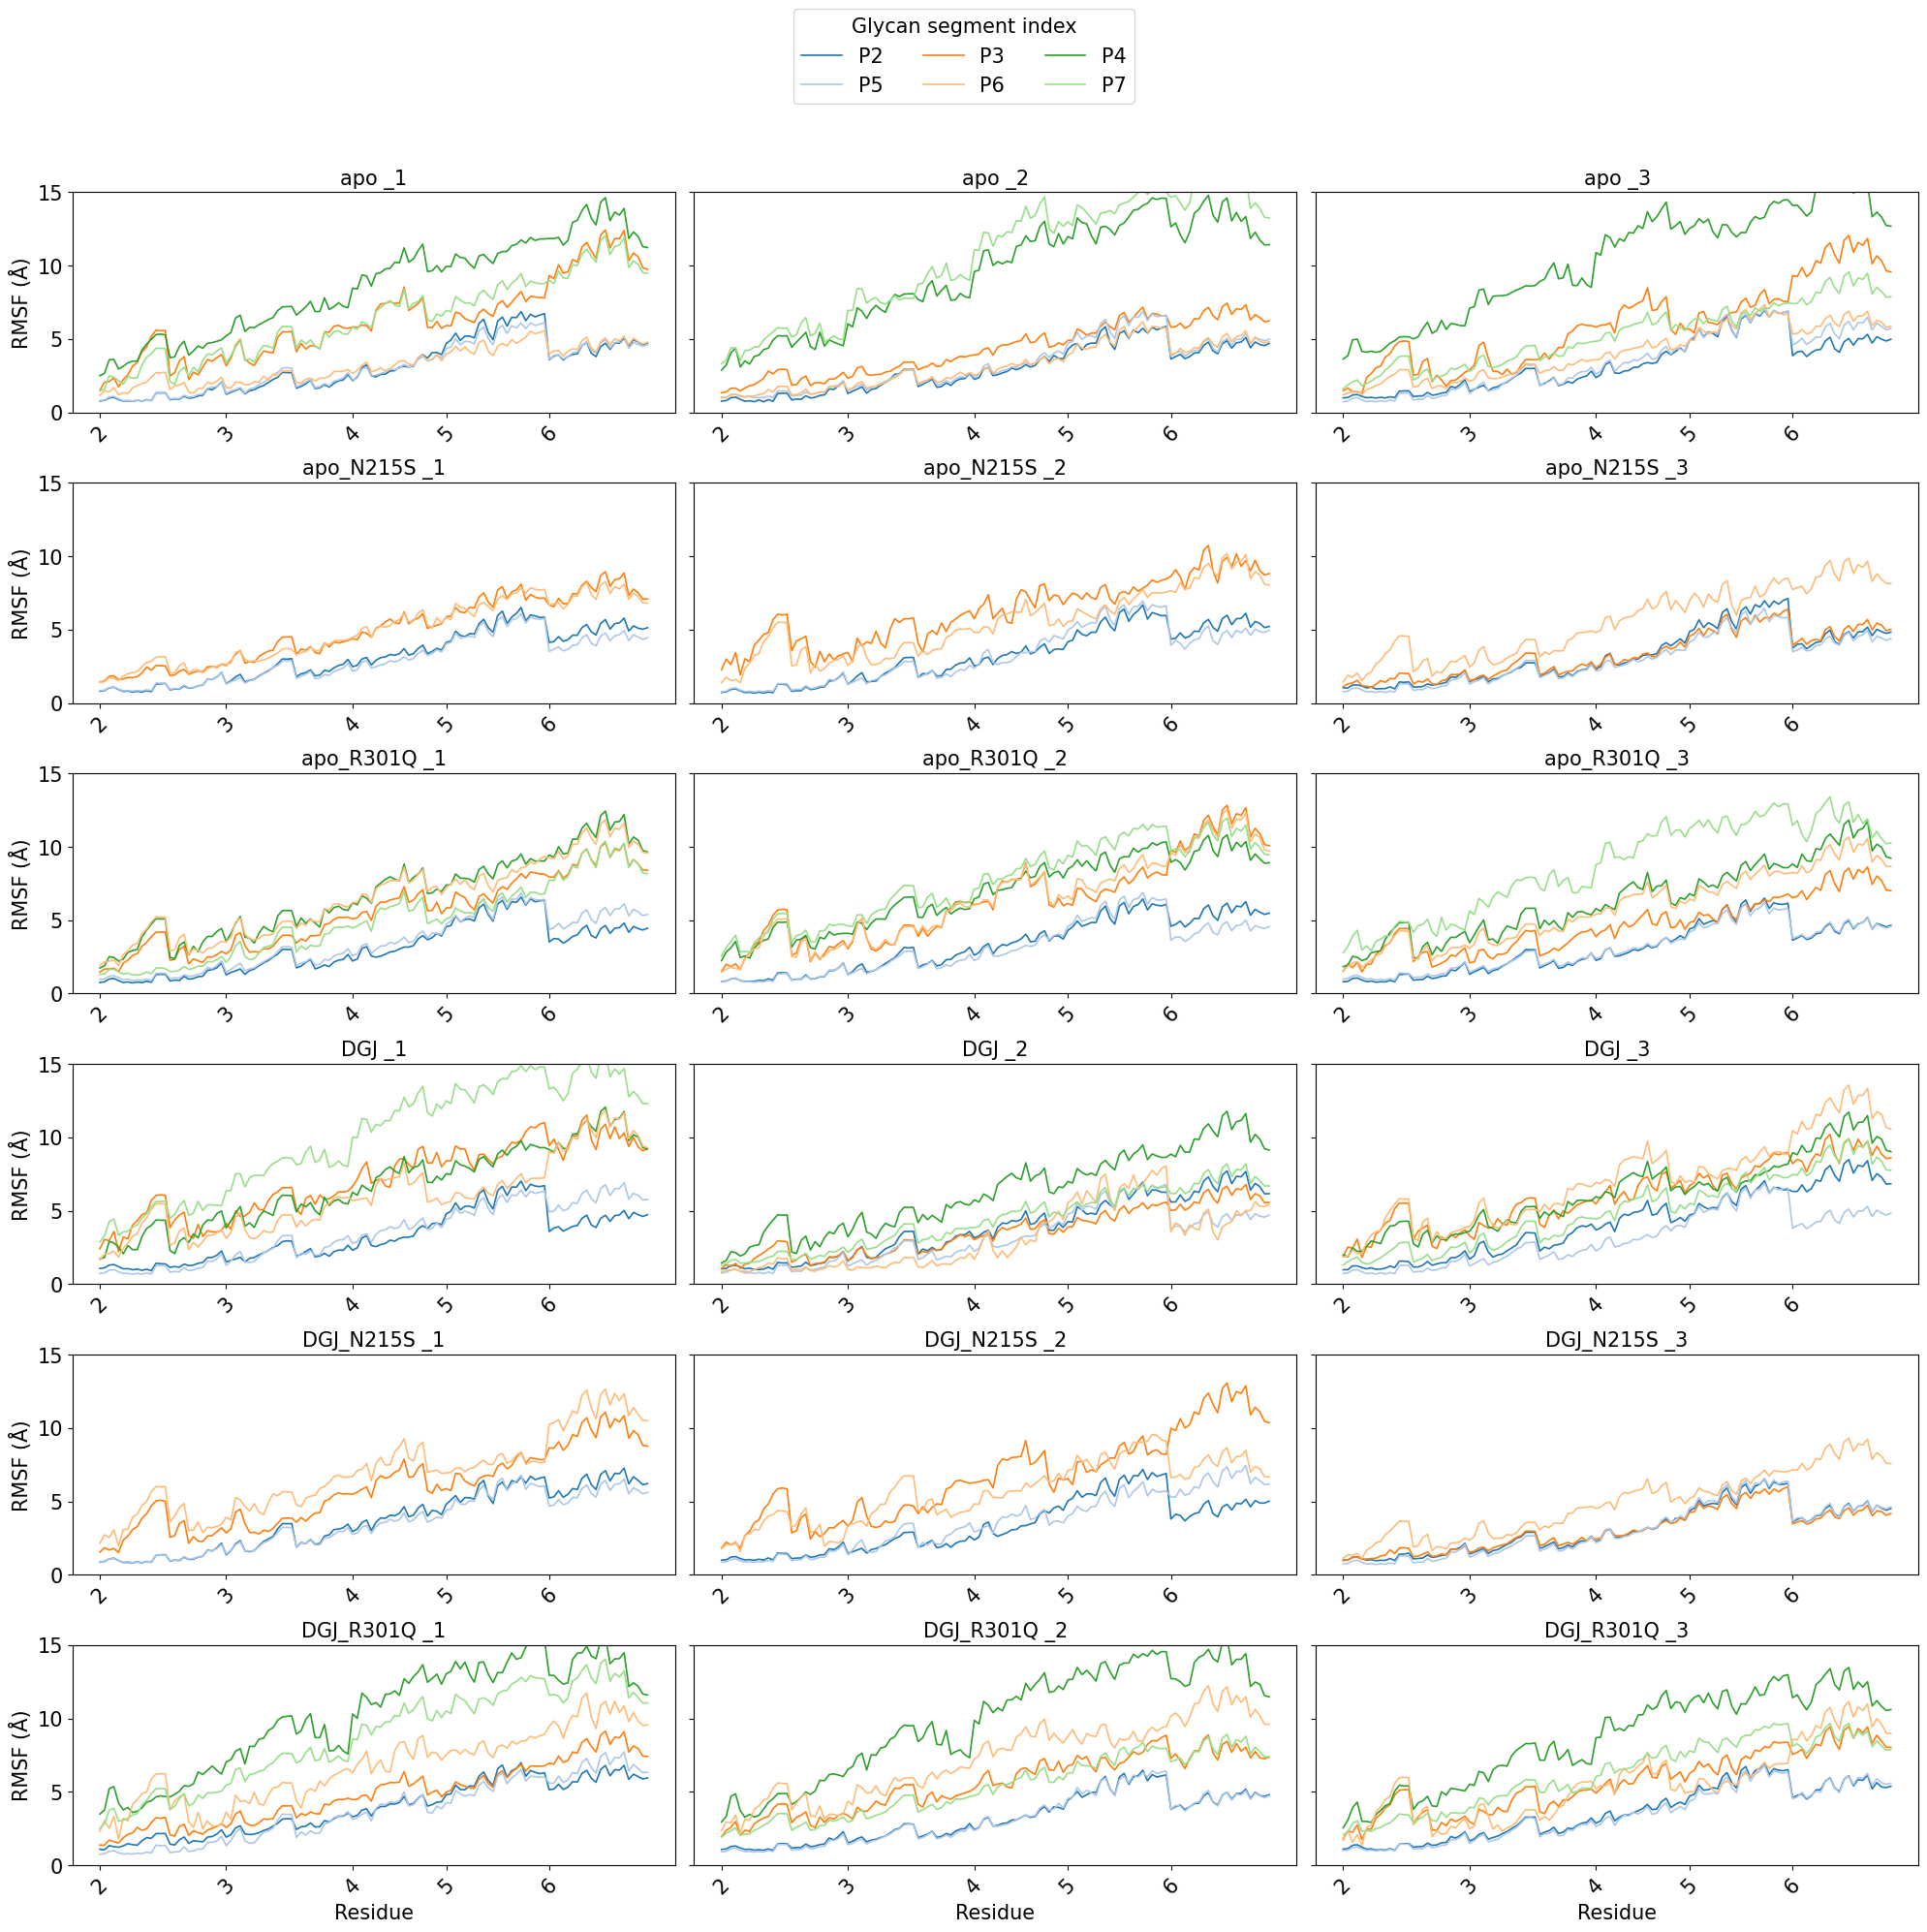

In [17]:

structures = ['apo', 'apo_N215S', 'apo_R301Q',
              'DGJ', 'DGJ_N215S', 'DGJ_R301Q']
replicas = ['_1', '_2', '_3']
segid_ids = ['P2', 'P3', 'P4', 'P5', 'P6', 'P7']

fig, axes = plt.subplots(len(structures), len(replicas), figsize=(20, 20), sharey=True)
axes = axes.flatten()

cmap = plt.cm.tab20
colors = [cmap(i) for i in range(6)]
replica_colors = {
    'P2': colors[0], 'P5': colors[1],
    'P3': colors[2], 'P6': colors[3],
    'P4': colors[4], 'P7': colors[5],
}

for i, (s, r) in enumerate([(s, r) for s in structures for r in replicas]):
    for sig in segid_ids:
        ax = axes[i]
        if (sig == 'P4' or sig=='P7') and (s == 'apo_N215S' or s == 'DGJ_N215S'):
            continue
        
        data = pd.read_csv(f'../results/tables/{s}{r}_gly_{sig}_rmsf.csv')

        for sid, color in replica_colors.items():
            segid_data = data[data['segid'] == sid].copy().reset_index(drop=True)
            label = sid if i == 0 else None

        # Plot RMSF per atom
            ax.plot(np.arange(len(segid_data)),segid_data['rmsf'],linestyle="-", linewidth=1.2, label=label, color=color)

    #ref_seg = data[data['segid'] == segid_ids[0]].copy().reset_index(drop=True)
    residues = data['resid'].values

    change_indices = np.concatenate(([0], np.where(np.diff(residues) != 0)[0] + 1))
    tick_positions = change_indices
    tick_labels = residues[change_indices]

    if len(tick_labels) > 20:
        step = len(tick_labels) // 20
        tick_positions = tick_positions[::step]
        tick_labels = tick_labels[::step]

    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45)

    ax.set_title(f"{s} {r}")
    if i % len(replicas) == 0:
        ax.set_ylabel("RMSF (Å)")
    if i >= len(structures)*len(replicas) - len(replicas):
        ax.set_xlabel("Residue")

ax.set_ylim(0, 15)
handles, labels = axes[0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
fig.legend(unique.values(), unique.keys(),
           loc='upper center', bbox_to_anchor=(0.5, 1),
           ncol=3, title = 'Glycan segment index')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("../results/plots/rmsf_gly_sep.pdf", dpi=300)
plt.show()
